# Image Filtering

# **Yushan He**
# **ID: 801056761**

## 1.Import Package

In [0]:
import matplotlib.pyplot as plt
from PIL import Image 
import numpy as np

## show the original image

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


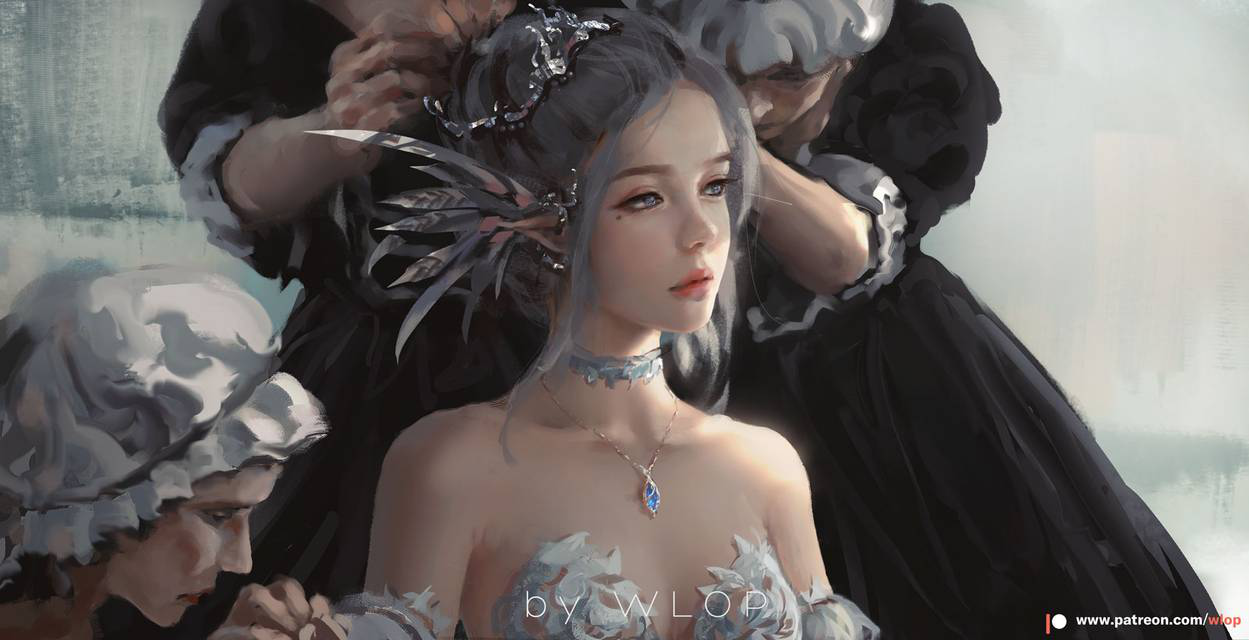

In [0]:
img = Image.open('/content/drive/My Drive/Colab Notebooks/dressing_by_wlop_dc845dv-pre.jpg')
img

In [0]:
##img ##RGB
image_array = np.array(img)
print(type(image_array))

<class 'numpy.ndarray'>


In [0]:
 kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

In [0]:
print(type(kernel))

<class 'numpy.ndarray'>


In [0]:
image_array.shape ###height * weight * RGB

(640, 1249, 3)

In [0]:
kernel

array([[-1, -1, -1],
       [-1,  9, -1],
       [-1, -1, -1]])

In [0]:
newImg = np.zeros((642, 1251, 3), dtype=image_array.dtype)
newImg[1:641,1:1250,:] = image_array


In [0]:
def sharpenPicture(image,kernel):
    ##sharpenPicture
    picture = image.copy()
    image_x = image.shape[0]
    image_y = image.shape[1]
    picture_final = image.copy()

    for x in range(1,image_x-1):
        for y in range(1,image_y-1): 

            up_R = kernel[0,0]*picture[x-1,y-1,0]+kernel[0,1]*picture[x,y-1,0]+kernel[0,2]*picture[x+1,y-1,0]
            middle_R = kernel[1,0]*picture[x-1,y,0]+kernel[1,1]*picture[x,y,0]+kernel[1,2]*picture[x+1,y,0]
            down_R = kernel[2,0]*picture[x-1,y+1,0]+kernel[2,1]*picture[x,y+1,0]+kernel[1,2]*picture[x+1,y+1,0]
            
            up_G = kernel[0,0]*picture[x-1,y-1,1]+kernel[0,1]*picture[x,y-1,1]+kernel[0,2]*picture[x+1,y-1,1]
            middle_G = kernel[1,0]*picture[x-1,y,1]+kernel[1,1]*picture[x,y,1]+kernel[1,2]*picture[x+1,y,1]
            down_G = kernel[2,0]*picture[x-1,y+1,1]+kernel[2,1]*picture[x,y+1,1]+kernel[1,2]*picture[x+1,y+1,1]
            
            up_B = kernel[0,0]*picture[x-1,y-1,2]+kernel[0,1]*picture[x,y-1,2]+kernel[0,2]*picture[x+1,y-1,2]
            middle_B = kernel[1,0]*picture[x-1,y,2]+kernel[1,1]*picture[x,y,2]+kernel[1,2]*picture[x+1,y,2]
            down_B = kernel[2,0]*picture[x-1,y+1,2]+kernel[2,1]*picture[x,y+1,2]+kernel[1,2]*picture[x+1,y+1,2]
            
            R_final = (up_R+middle_R+down_R)
            G_final = (up_G+middle_G+down_G)
            B_final = (up_B+middle_B+down_B)
            
            if R_final > 255:
                R_final = 255
            if R_final < 0:
                R_final = 0
                
            if G_final > 255:
                G_final = 255
            if G_final < 0:
                G_final = 0
                
            if B_final > 255:
                B_final = 255
            if B_final < 0:
                B_final = 0
                
                
            picture_final[x,y,0] = R_final ##R value
            picture_final[x,y,1] = G_final ##G value
            picture_final[x,y,2] = B_final ##B value

    
            
    return picture_final

In [0]:
picture = sharpenPicture(image_array,kernel)

In [0]:
result = Image.fromarray(picture)

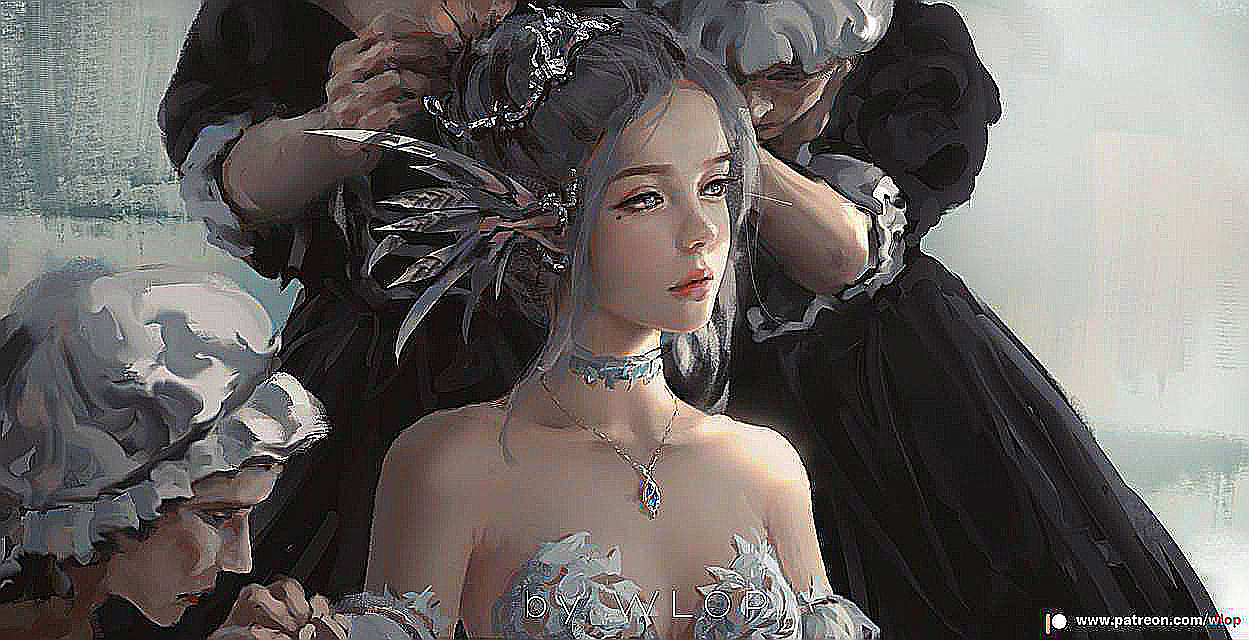

In [0]:
result

In [0]:
def sharpen(image_array,kernel):
    ##sharpenPicture
    image_x = image_array.shape[0]
    image_y = image_array.shape[1]

    image = np.zeros((image_x+2, image_y+2, 3), dtype=image_array.dtype)
    image[1:image_x+1,1:image_y+1,:] = image_array

    picture = image.copy()
    picture_final = image_array.copy()

    for x in range(1,image_x):
        for y in range(1,image_y): 
            up_R = kernel[0,0]*picture[x-1,y-1,0]+kernel[0,1]*picture[x,y-1,0]+kernel[0,2]*picture[x+1,y-1,0]
            middle_R = kernel[1,0]*picture[x-1,y,0]+kernel[1,1]*picture[x,y,0]+kernel[1,2]*picture[x+1,y,0]
            down_R = kernel[2,0]*picture[x-1,y+1,0]+kernel[2,1]*picture[x,y+1,0]+kernel[1,2]*picture[x+1,y+1,0]
            
            up_G = kernel[0,0]*picture[x-1,y-1,1]+kernel[0,1]*picture[x,y-1,1]+kernel[0,2]*picture[x+1,y-1,1]
            middle_G = kernel[1,0]*picture[x-1,y,1]+kernel[1,1]*picture[x,y,1]+kernel[1,2]*picture[x+1,y,1]
            down_G = kernel[2,0]*picture[x-1,y+1,1]+kernel[2,1]*picture[x,y+1,1]+kernel[1,2]*picture[x+1,y+1,1]
            
            up_B = kernel[0,0]*picture[x-1,y-1,2]+kernel[0,1]*picture[x,y-1,2]+kernel[0,2]*picture[x+1,y-1,2]
            middle_B = kernel[1,0]*picture[x-1,y,2]+kernel[1,1]*picture[x,y,2]+kernel[1,2]*picture[x+1,y,2]
            down_B = kernel[2,0]*picture[x-1,y+1,2]+kernel[2,1]*picture[x,y+1,2]+kernel[1,2]*picture[x+1,y+1,2]

            R_final = (up_R+middle_R+down_R)
            G_final = (up_G+middle_G+down_G)
            B_final = (up_B+middle_B+down_B)
        
            if R_final > 255:
                R_final = 255
            if R_final < 0:
                R_final = 0
                
            if G_final > 255:
                G_final = 255
            if G_final < 0:
                G_final = 0
                
            if B_final > 255:
                B_final = 255
            if B_final < 0:
                B_final = 0
                
                
            picture_final[x,y,0] = R_final ##R value
            picture_final[x,y,1] = G_final ##G value
            picture_final[x,y,2] = B_final ##B value

    
            
    return picture_final

In [0]:
picture = sharpen(image_array,kernel)

In [0]:
picture.shape

(640, 1249, 3)

In [0]:
result = Image.fromarray(picture)

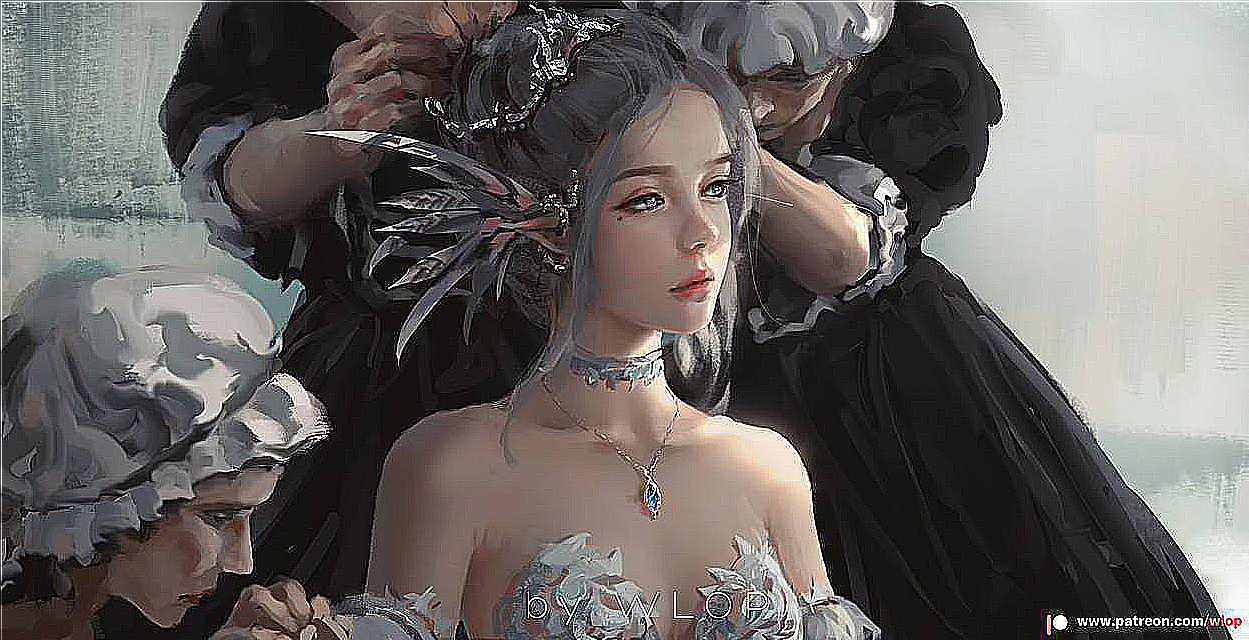

In [0]:
result

In [0]:
def sharpen2(image,kernel):
    ##sharpenPicture
    image_x = image.shape[0]
    image_y = image.shape[1]

    picture = image.copy()
    picture_final = image.copy()
    

    for x in range(0,image_x):
        for y in range(0,image_y): 
            try:
                up_R = kernel[0,0]*picture[x-1,y-1,0]+kernel[0,1]*picture[x,y-1,0]+kernel[0,2]*picture[x+1,y-1,0]
                middle_R = kernel[1,0]*picture[x-1,y,0]+kernel[1,1]*picture[x,y,0]+kernel[1,2]*picture[x+1,y,0]
                down_R = kernel[2,0]*picture[x-1,y+1,0]+kernel[2,1]*picture[x,y+1,0]+kernel[1,2]*picture[x+1,y+1,0]
                
                up_G = kernel[0,0]*picture[x-1,y-1,1]+kernel[0,1]*picture[x,y-1,1]+kernel[0,2]*picture[x+1,y-1,1]
                middle_G = kernel[1,0]*picture[x-1,y,1]+kernel[1,1]*picture[x,y,1]+kernel[1,2]*picture[x+1,y,1]
                down_G = kernel[2,0]*picture[x-1,y+1,1]+kernel[2,1]*picture[x,y+1,1]+kernel[1,2]*picture[x+1,y+1,1]
                
                up_B = kernel[0,0]*picture[x-1,y-1,2]+kernel[0,1]*picture[x,y-1,2]+kernel[0,2]*picture[x+1,y-1,2]
                middle_B = kernel[1,0]*picture[x-1,y,2]+kernel[1,1]*picture[x,y,2]+kernel[1,2]*picture[x+1,y,2]
                down_B = kernel[2,0]*picture[x-1,y+1,2]+kernel[2,1]*picture[x,y+1,2]+kernel[1,2]*picture[x+1,y+1,2]

                R_final = (up_R+middle_R+down_R)
                G_final = (up_G+middle_G+down_G)
                B_final = (up_B+middle_B+down_B)
            except:
                continue
                
        
            if R_final > 255:
                R_final = 255
            if R_final < 0:
                R_final = 0
                
            if G_final > 255:
                G_final = 255
            if G_final < 0:
                G_final = 0
                
            if B_final > 255:
                B_final = 255
            if B_final < 0:
                B_final = 0
                
                
            picture_final[x,y,0] = R_final ##R value
            picture_final[x,y,1] = G_final ##G value
            picture_final[x,y,2] = B_final ##B value

    
            
    return picture_final

In [0]:
picture = sharpen2(image_array,kernel)

In [0]:
picture.shape

(640, 1249, 3)

In [0]:
result = Image.fromarray(picture)

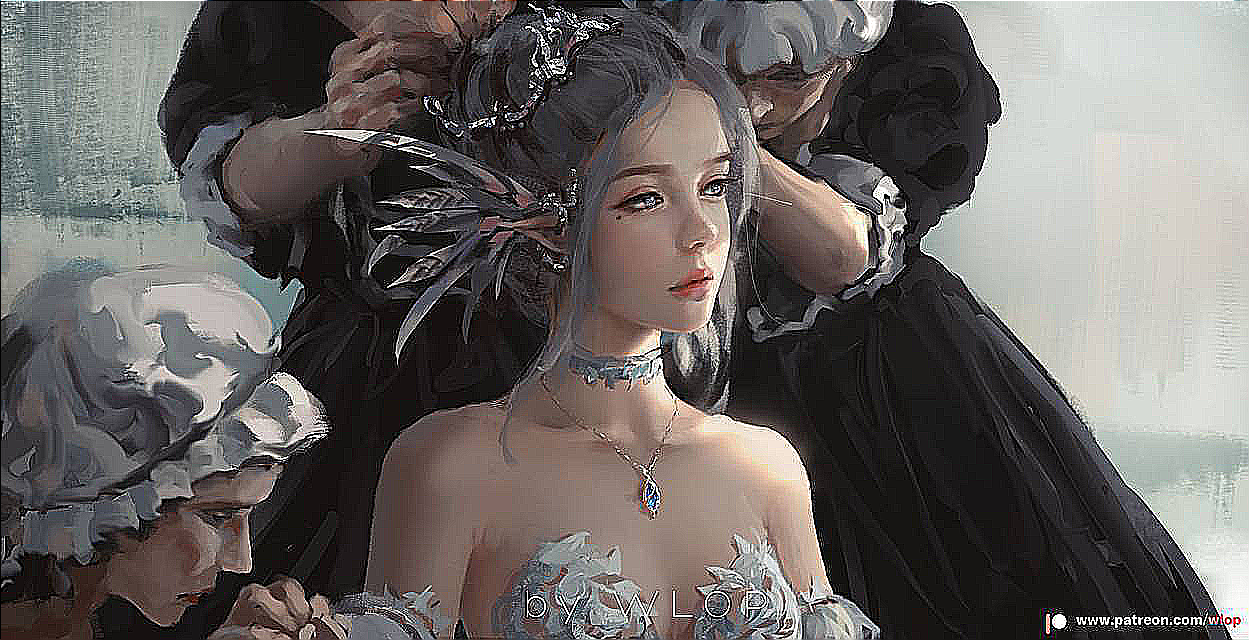

In [0]:
result

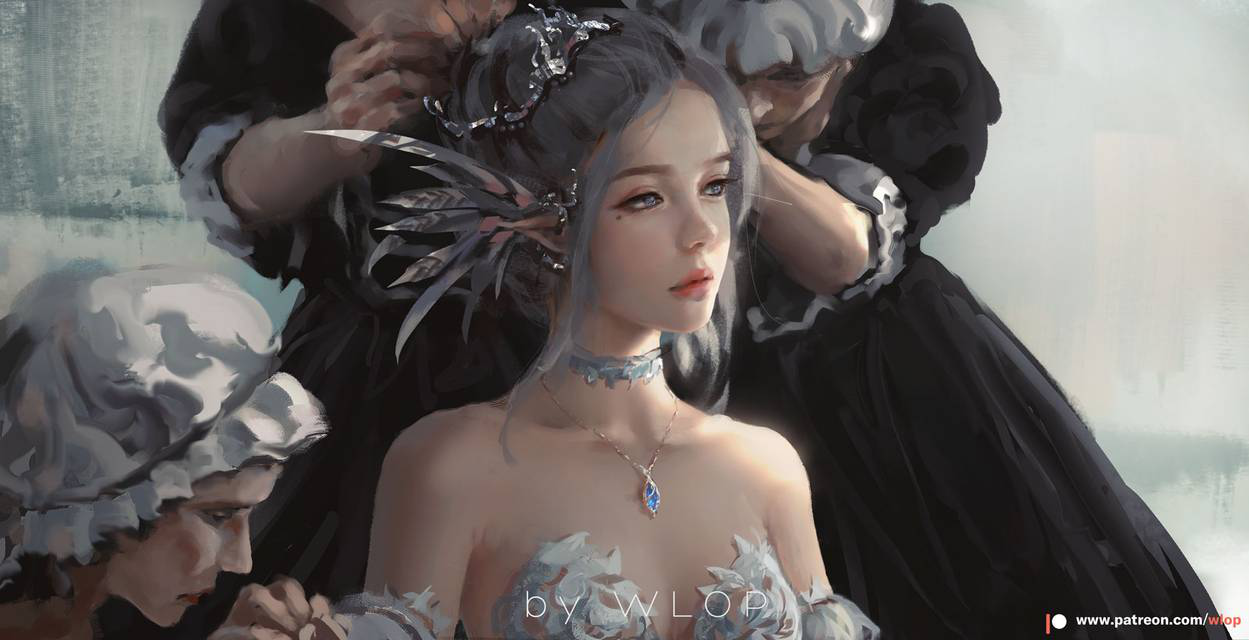

In [0]:
img